<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Para poder dar un correcto seguimiento de los proyectos se debe mantener los comentarios en cada revisión, de lo contrario no se puede seguir el avance que vas teniendo. 
    
Dado el caso, la intervención será breve ya que no existen los comentarios anteriores para referenciar los cambios.
</div>

# Test A/B
**Nombre de la prueba:** recommender_system_test

**Propósito de la prueba:** probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado.

Grupo A: grupo de control.

Grupo B: grupo con el nuevo embudo de pago

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [80]:
# Definir la ruta base de los archivos
ab_project = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")
final_ab_new_users = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
final_ab_events = pd.read_csv("/datasets/final_ab_events_upd_us.csv")
final_ab_participants = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")


**Visualizar el DF ab_project**

In [81]:
ab_project.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [82]:
ab_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [83]:
# Modificar las columnas start_dt y finish_dt a formato datetime
ab_project['start_dt'] = pd.to_datetime(ab_project['start_dt'], format='%Y-%m-%d')
ab_project['finish_dt'] = pd.to_datetime(ab_project['finish_dt'], format='%Y-%m-%d')

In [84]:
# Revisar valores duplicados
ab_project.duplicated().sum()

0

**Visualizar el DF final_ab_new_users**

In [85]:
final_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [86]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [87]:
# Revisar valores duplicados
final_ab_new_users.duplicated().sum()

0

In [88]:
# Modificar la columna first_date a formato datetime
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'], format='%Y-%m-%d')

**Visualizar el DF final_ab_events**

In [89]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [90]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [91]:
# Revisar valores duplicados
final_ab_events.duplicated().sum()

0

**Visualizar DF final_ab_participants**

In [92]:
final_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [93]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [94]:
#Revisar valores duplicados
final_ab_participants.duplicated().sum()

0

In [95]:
# Revisar valores duplicados en la columna user_id para ambos grupos
group_counts = final_ab_participants.groupby('group').size()

# Contar usuarios duplicados (que están en ambos grupos)
duplicated_users = final_ab_participants.duplicated(subset=['user_id'], keep=False).sum()

print(f'Usuarios en ambos grupos: {duplicated_users}')
print(group_counts)


Usuarios en ambos grupos: 1774
group
A    8214
B    6311
dtype: int64


In [96]:
# Eliminar los valores duplicados
duplicated_users=final_ab_participants[final_ab_participants.duplicated(subset=['user_id'], keep=False)]['user_id'].unique()
unique_participants=final_ab_participants[~final_ab_participants['user_id'].isin(duplicated_users)]
count_group_A = unique_participants[unique_participants['group'] == 'A']['user_id'].nunique()
count_group_B = unique_participants[unique_participants['group'] == 'B']['user_id'].nunique()
print(count_group_A)
print(count_group_B)

7093
5658


**Análisis EDA**

Análisis de la distribución de eventos a lo largo del tiempo

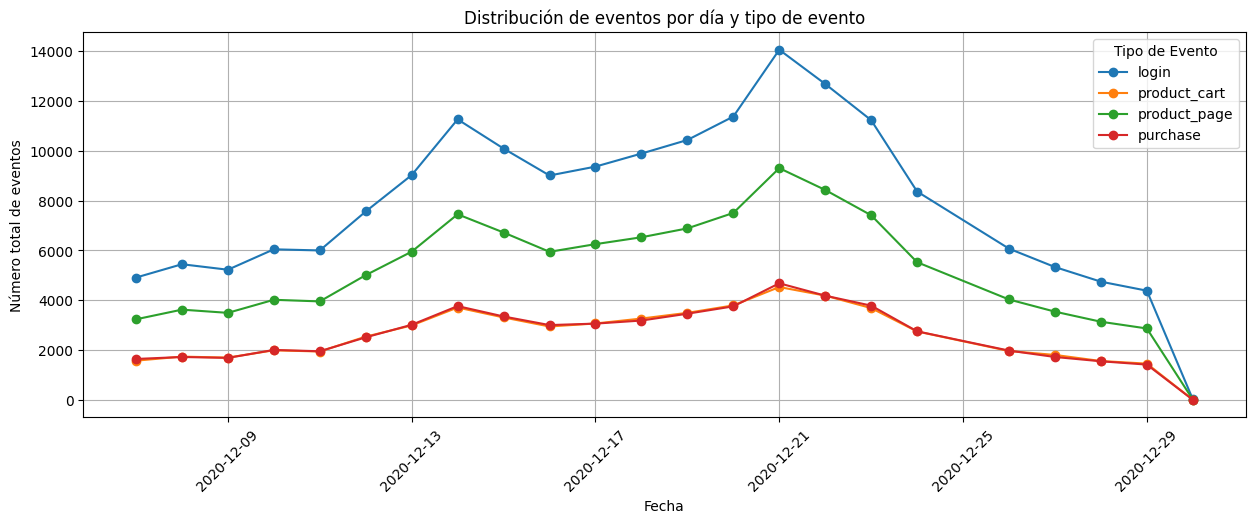

In [97]:
# Contar el número de eventos por tipo
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt']).dt.date
event_counts = final_ab_events.groupby(['event_dt', 'event_name']).size().reset_index(name='event_count')

# Graficar
plt.figure(figsize=(15, 5))

for event in event_counts['event_name'].unique():
    subset = event_counts[event_counts['event_name'] == event]
    plt.plot(subset['event_dt'], subset['event_count'], marker='o', linestyle='-', label=event)

# Configurar etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Número total de eventos")
plt.title("Distribución de eventos por día y tipo de evento")
plt.legend(title="Tipo de Evento")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

El comportamiento de los usuarios de la tienda en línea ha experimentado un aumento desde el 2020, esto puede deberse a que la mayoría de los compradores no podían salir de sus casas debido a la pandemia. También se puede visualizar que no todas las sesiones iniciadas terminan en compras  y no todos los productos agregados al carrito terminan siendo comprados.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Deberías tener una gráfica de líneas por cada fecha (Sin el dato de hora:minutos:segundos) y se debe contar el total no evento por evento, lo que si se debe separar es que debe haber 2 líneas una por cada grupo
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (3ra Iteración)</b> <a class="tocSkip"></a>
    
Bien, ahora se puede ver mejor la tendencia sólo que sería mejor **mostrar por grupo AB** en lugar de evento ya que los eventos tendrán una tendencia similar

Estudiar la conversión en las diferentes etapas del embudo.

In [98]:
# Unir los eventos con los participantes para obtener el grupo de cada usuario
events = final_ab_events.merge(final_ab_participants, on='user_id')
events_A = events[events['group'] == 'A']
events_B = events[events['group'] == 'B']

# Contar el número de eventos por tipo para el grupo A
A_login = events_A[events_A['event_name'] == 'login']['user_id'].nunique()
A_product_page = events_A[events_A['event_name'] == 'product_page']['user_id'].nunique()
A_cart = events_A[events_A['event_name'] == 'product_cart']['user_id'].nunique()
A_purchase = events_A[events_A['event_name'] == 'purchase']['user_id'].nunique()

# Contar el número de eventos por tipo para el grupo B
B_login = events_B[events_B['event_name'] == 'login']['user_id'].nunique()
B_product_page = events_B[events_B['event_name'] == 'product_page']['user_id'].nunique()
B_cart = events_B[events_B['event_name'] == 'product_cart']['user_id'].nunique()
B_purchase = events_B[events_B['event_name'] == 'purchase']['user_id'].nunique()

# Calcular tasas de conversión usando "login" como base
conv_A_product_page = A_product_page / A_login
conv_A_cart = A_cart / A_login
conv_A_final = A_purchase / A_login

conv_B_product_page = B_product_page / B_login
conv_B_cart = B_cart / B_login
conv_B_final = B_purchase / B_login

# Mostrar resultados
print(f"Tasa de conversión A - login → product_page: {conv_A_product_page:.2%}")
print(f"Tasa de conversión A - login → product_cart: {conv_A_cart:.2%}")
print(f"Tasa de conversión A - login → purchase: {conv_A_purchase:.2%}")

print(f"Tasa de conversión B - login → product_page: {conv_B_product_page:.2%}")
print(f"Tasa de conversión B - login → product_cart: {conv_B_cart:.2%}")
print(f"Tasa de conversión B - login → purchase: {conv_B_purchase:.2%}")


Tasa de conversión A - login → product_page: 66.15%
Tasa de conversión A - login → product_cart: 31.54%
Tasa de conversión A - login → purchase: 34.07%
Tasa de conversión B - login → product_page: 64.25%
Tasa de conversión B - login → product_cart: 32.83%
Tasa de conversión B - login → purchase: 32.37%


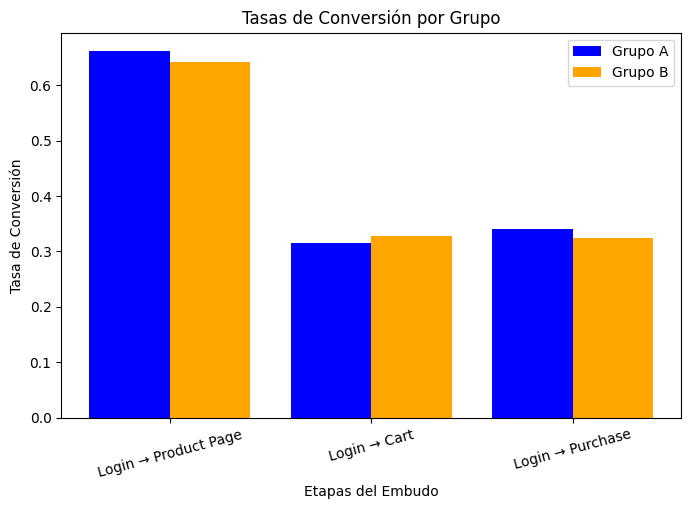

In [99]:
# Grafica de barra para mostrar el resultado
etapas = ['Login → Product Page', 'Login → Cart', 'Login → Purchase']
tasas_A = [conv_A_product_page, conv_A_cart, conv_A_purchase]
tasas_B = [conv_B_product_page, conv_B_cart, conv_B_purchase]

# Crear gráfico
x = np.arange(len(etapas))  # Posiciones en X
width = 0.4  # Ancho de las barras

plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.bar(x - width/2, tasas_A, width, label='Grupo A', color='blue')
plt.bar(x + width/2, tasas_B, width, label='Grupo B', color='orange')

# Etiquetas
plt.xticks(x, etapas, rotation=15)  # Poner nombres a las barras
plt.xlabel('Etapas del Embudo')
plt.ylabel('Tasa de Conversión')
plt.title('Tasas de Conversión por Grupo')
plt.legend()

plt.show()

No se cumplió el objetivo esperado, el grupo B no alcanzó al menos un 10% de aumento como se esperaba, al contrario hubo una disminución.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Podrías complementar esto de una mejor manera con un gráfico de barras mostrando la conversión de cada evento por grupo
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteración)</b> <a class="tocSkip"></a>
    
Excelente, así es mucho más fácil hacer la comparación de proporciones entre cada grupo

**Prueba z para comprobar la diferencia estadística entre las proporciones**

Hipótesis Nula: No hay diferencia significativa en la conversión entre los grupos A y B.

Hipótesis Alternativa: Hay una diferencia significativa en la conversión entre los grupos.

In [101]:
# Calcular el total de usuarios en cada grupo (para las pruebas Z)
users_A = len(events_A['user_id'].unique())
users_B = len(events_B['user_id'].unique())

# Cantidad de conversiones para cada grupo
conversions_A_page_cart = count_group_A * conv_A_product_page
conversions_B_page_cart = count_group_B * conv_B_product_page

conversions_A_cart_purchase = conversions_A_page_cart * conv_A_purchase
conversions_B_cart_purchase = conversions_B_page_cart * conv_B_purchase

conversions_A_page_purchase = count_group_A * conv_A_final
conversions_B_page_purchase = count_group_B * conv_B_final

# Realizar prueba Z
def z_test_conversion(success_A, success_B, total_A, total_B):
    count = np.array([success_A, success_B])
    nobs = np.array([total_A, total_B])
    z_score, p_value = proportions_ztest(count, nobs)
    return z_score, p_value

# Pruebas Z para cada conversión
z1, p1 = z_test_conversion(conversions_A_page_cart, conversions_B_page_cart, users_A, users_B)
z2, p2 = z_test_conversion(conversions_A_cart_purchase, conversions_B_cart_purchase, users_A, users_B)
z3, p3 = z_test_conversion(conversions_A_page_purchase, conversions_B_page_purchase, users_A, users_B)

# Resultados
print(f"Z-score (Product Page → Cart): {z1:.2f}, p-valor: {p1:.5f}")
print(f"Z-score (Cart → Purchase): {z2:.2f}, p-valor: {p2:.5f}")
print(f"Z-score (Product Page → Purchase): {z3:.2f}, p-valor: {p3:.5f}")  


Z-score (Product Page → Cart): 1.20, p-valor: 0.22897
Z-score (Cart → Purchase): 1.98, p-valor: 0.04760
Z-score (Product Page → Purchase): 1.51, p-valor: 0.13190


Dado que todos los p-valores son mayores a 0.05, no podemos rechazar la hipótesis nula de que las tasas de conversión en ambos grupos son iguales.

**Conclusión**:

- Al realizar el Análisis Exploratorio se encontraron user_id duplicados en ambos grupos, lo cual estaba haciendo que la prueba diera resultados erróneos. 
- Se encuentra que la introducción de un sistema de recomendaciones mejorado no ayudó a la conversión de compradores, al contrario, hubo una disminución.  
- No se acepta la hipótesis nula de que no hay diferencia significativa en la conversión entre los grupos A y B, ya que el p-value es mayor a 0.05 para los eventos Product Page → Cart y roduct Page → Purchase, para el evento Cart → Purchase) no se puede rechazar la Hipótesis nula de que no diferencias significativas entre los grupos. Es decir, el nuevo embudo de pago pudo mejorar esta sección en el embudo, pero siendo más estricto con el alpha, este evento no pasaría la prueba.
- Dado lo anterior, se debe revisar si este método de pago está teniendo alguna falla que hace que los clientes potenciales desistan de su compra.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteración)</b> <a class="tocSkip"></a>
    
Buen trabajo con los últimos cambios Susana, de esta forma tu prueba AB tiene más detalles y las métricas se comparan para cada grupo. Siempre en este tipo de análisis debes buscar aprender lo más que se pueda del comportamiento de los grupos ya que esto ayudará con la toma de decisiones en la empresa para la cual realices el análisis.
    
Saludos!